<a href="https://colab.research.google.com/github/Prabhjot-Singh-13/Prabhjot-Singh-13/blob/main/01_Neural_Networks_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **REGRESSION**
Regression is a statistical method used to analyze the relationship between variables, aiming to predict the value of one variable based on the values of others. It seeks to find the best-fit line or curve that describes the pattern of the data points.

We will cover
* Artitecture of neural regresion model including input and output shapes
*Creating the custom data to view and fit
*Steps in modelling >Creating>Compiling>Fitting>evaluating model
*Different evaluation method
*Saving and loading Models



#INPUT AND OUTPUT OF THE ALGORITHUM
*Independent varibles(Features) converted into numerical encoding(one hot)

*Embedding ,wieghts or feature vectors all are same

Input layer shape>
Hidden layer>
Neuron per layer>
Output layer shape>
Hidden activation>
Output activation>
Loss function>
Optimizer>



In [43]:
#importing tensorflow
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
#Importing dataset
from google.colab import files
uploaded = files.upload()

Saving Telecom.xlsx to Telecom (1).xlsx


In [45]:
df = pd.read_excel('Telecom.xlsx',sheet_name='Telecom',index_col=0)
df.head(),df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4888 entries, 200000 to 204887
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlanTaken               4888 non-null   int64  
 1   Age                     4662 non-null   float64
 2   TypeofContact           4863 non-null   object 
 3   CityTier                4888 non-null   int64  
 4   DurationOfPitch         4637 non-null   float64
 5   Occupation              4888 non-null   object 
 6   Gender                  4888 non-null   object 
 7   NumberOfPersons         4888 non-null   int64  
 8   NumberOfFollowups       4843 non-null   float64
 9   PlanPitched             4888 non-null   object 
 10  PreferredServiceStar    4862 non-null   float64
 11  MaritalStatus           4888 non-null   object 
 12  NumberOfUpgrades        4748 non-null   float64
 13  iPhone                  4888 non-null   int64  
 14  PitchSatisfactionScore  4888 non-null 

(            PlanTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
 CustomerID                                                                
 200000              1  41.0     Self Enquiry         3              6.0   
 200001              0  49.0  Company Invited         1             14.0   
 200002              1  37.0     Self Enquiry         1              8.0   
 200003              0  33.0  Company Invited         1              9.0   
 200004              0   NaN     Self Enquiry         1              8.0   
 
                 Occupation  Gender  NumberOfPersons  NumberOfFollowups  \
 CustomerID                                                               
 200000            Salaried  Female                3                3.0   
 200001            Salaried    Male                3                4.0   
 200002         Free Lancer    Male                3                4.0   
 200003            Salaried  Female                2                3.0   
 200004      Sma

In [50]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 200000 to 204887
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlanTaken               4128 non-null   int64  
 1   Age                     4128 non-null   float64
 2   TypeofContact           4128 non-null   object 
 3   CityTier                4128 non-null   int64  
 4   DurationOfPitch         4128 non-null   float64
 5   Occupation              4128 non-null   object 
 6   Gender                  4128 non-null   object 
 7   NumberOfPersons         4128 non-null   int64  
 8   NumberOfFollowups       4128 non-null   float64
 9   PlanPitched             4128 non-null   object 
 10  PreferredServiceStar    4128 non-null   float64
 11  MaritalStatus           4128 non-null   object 
 12  NumberOfUpgrades        4128 non-null   float64
 13  iPhone                  4128 non-null   int64  
 14  PitchSatisfactionScore  4128 non-null 

In [51]:
#Putting the value in X and y the splitting
X = df.drop("PlanTaken",axis=1)
y = df["PlanTaken"]
X.shape,y.shape

((4128, 18), (4128,))

In [52]:
#lets make a column transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
transformer = ColumnTransformer(
    transformers=[
        ("scaler",StandardScaler(),X.select_dtypes(include=['float64', 'int64']).columns),
        ("encoder",OneHotEncoder(),X.select_dtypes(include=['object']).columns)
    ]
)

In [53]:
transformer

ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersons',
       'NumberOfFollowups', 'PreferredServiceStar', 'NumberOfUpgrades',
       'iPhone', 'PitchSatisfactionScore', 'PhoneContract', 'NumberOfChildren',
       'MonthlyIncome'],
      dtype='object')),
                                ('encoder', OneHotEncoder(),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'PlanPitched', 'MaritalStatus',
       'Designation'],
      dtype='object'))])

In [54]:
#splitting the data in training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [55]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2765, 18), (1363, 18), (2765,), (1363,))

In [56]:
#Transforming the training data
X_train = transformer.fit_transform(X_train)


In [57]:
#transforming testing data
X_test = transformer.transform(X_test)

## Now lets start modelling this tensor
1. **Creating a model** - Define the imput and output layer as well as hidden layer of deep learning model
2. **Compile a model** - Define the loss fumction and optimizer(tell model how to improve the patterns or wieghts of learming) and evaluation matrics (what we can use to interepret the performance of model)
3. **Fitting the model** - to make predictions

In [86]:
#Converting the data to tensor
X_train_tensor = tf.convert_to_tensor(X_train)
X_test_tensor = tf.convert_to_tensor(X_test)
y_train_tensor = tf.convert_to_tensor(y_train)
y_test_tensor = tf.convert_to_tensor(y_test)

### Initial model improvemnet steps


Encountering `NaN` values in loss and MSE metrics can be quite challenging. Here are some steps and additions you can consider to troubleshoot and improve your model:

1. **Data Preprocessing**:
   - Ensure there are no `NaN` values in your dataset. If there are, you'll need to handle them by either filling them with a value or removing the affected rows/columns.
   - Normalize your data. Neural networks tend to perform better when the input data is normalized or standardized.

2. **Model Architecture**:
   - Consider adding a `Dropout` layer to prevent overfitting.
   - Adjust the number of neurons in the hidden layers or the number of hidden layers themselves.

3. **Initialization**:
   - Use a different weight initialization method. Sometimes, the default initialization can lead to issues with training stability.

4. **Learning Rate**:
   - Adjust the learning rate. A learning rate that's too high can cause the model to converge too quickly to a suboptimal solution, and sometimes to `NaN` values.

5. **Batch Size**:
   - Experiment with the batch size. Smaller batch sizes can offer a more stable convergence at the cost of computation time.

6. **Gradient Clipping**:
   - Implement gradient clipping to prevent gradients from becoming too large and causing instability.

7. **Loss Function**:
   - Double-check that your loss function is appropriate for the task at hand.

Here's an example of how you might modify your model to include some of these suggestions:

```python
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["mse"]
)

model_1.fit(X_train_tensor, y_train_tensor, epochs=100, batch_size=32)
```

In this example, I've added `Dropout` layers to help with overfitting, used `he_normal` for weight initialization, and specified a learning rate for the Adam optimizer. Remember to adjust these parameters based on the performance of your model on validation data. Keep iterating until you find the best configuration for your specific dataset.

### model building 1


In [87]:

#X=np.expand_dims(X,axis=-1)
#  X = tf.reshape(X, shape=(-1, 1))
#  if the original X tensor has 8 elements, the reshaped tensor will have 8 rows and 1 column.
 #we do this because  input to the Dense layer in the model is expected to have a minimum of 2 dimensions
#set the global seed to make the data fix
tf.random.set_seed(13)
#creating the model by using sequesntial API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])
# lets start compiling the model
model_1.compile(loss=tf.keras.losses.mse,
              optimizer="adam",#stochastic gradient decent
              metrics=["mse"]
              )
#fitting the model
model_1.fit(X_train_tensor,y_train_tensor,epochs=100)

Epoch 1/100
87/87 [==============================] - 1s 2ms/step - loss: 0.1425 - mse: 0.1425
Epoch 2/100
87/87 [==============================] - 0s 2ms/step - loss: 0.1118 - mse: 0.1118
Epoch 3/100
87/87 [==============================] - 0s 2ms/step - loss: 0.0991 - mse: 0.0991
Epoch 4/100
87/87 [==============================] - 0s 2ms/step - loss: 0.0878 - mse: 0.0878
Epoch 5/100
87/87 [==============================] - 0s 2ms/step - loss: 0.0821 - mse: 0.0821
Epoch 6/100
87/87 [==============================] - 0s 2ms/step - loss: 0.0763 - mse: 0.0763
Epoch 7/100
87/87 [==============================] - 0s 2ms/step - loss: 0.0708 - mse: 0.0708
Epoch 8/100
87/87 [==============================] - 0s 2ms/step - loss: 0.0635 - mse: 0.0635
Epoch 9/100
87/87 [==============================] - 0s 2ms/step - loss: 0.0583 - mse: 0.0583
Epoch 10/100
87/87 [==============================] - 0s 2ms/step - loss: 0.0533 - mse: 0.0533
Epoch 11/100
87/87 [==============================] - 0s 2m

In [71]:

y_predict = model_1.predict(X_test_tensor)
y_pred_probs = model_1.predict(X_test_tensor)
y_predict,y_pred_probs

43/43 [==============================] - 0s 5ms/step


(array([[ 0.17676626],
        [ 0.22249968],
        [ 0.1234566 ],
        ...,
        [ 0.08363459],
        [ 0.16019113],
        [-0.06631458]], dtype=float32),
 array([[ 0.17676626],
        [ 0.22249968],
        [ 0.1234566 ],
        ...,
        [ 0.08363459],
        [ 0.16019113],
        [-0.06631458]], dtype=float32))

visulize the results

Accuracy: 0.9552
Recall: 0.8272
Precision: 0.9414
F1 Score: 0.8806


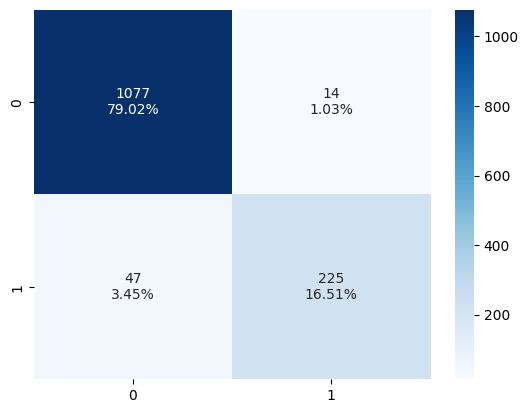

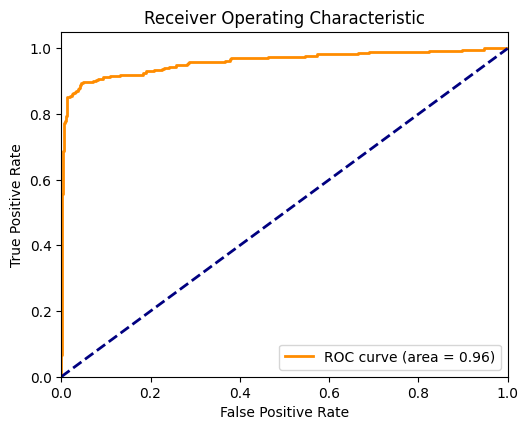

In [96]:
# FOR PRINTING THE EVALUATION MATRIX WITH RUC
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, auc

# Assuming y_pred are your model's probability predictions and y_test_tensor are the true labels
# Convert probabilities to binary predictions based on a threshold
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test_tensor, y_pred_binary)
recall = recall_score(y_test_tensor, y_pred_binary)
precision = precision_score(y_test_tensor, y_pred_binary)
f1 = f1_score(y_test_tensor, y_pred_binary)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
cf_matrix = confusion_matrix(y_test_tensor, y_pred_binary)

cf_matrix_percent = cf_matrix / np.sum(cf_matrix) * 100

labels = [f"{v1}\n{v2:.2f}%" for v1, v2 in zip(cf_matrix.flatten(), cf_matrix_percent.flatten())]
labels = np.asarray(labels).reshape(cf_matrix.shape)

# Plot the heatmap
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_tensor, y_pred)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(10, 8))

# Generate the confusion matrix


# Subplot for ROC Curve
plt.subplot(2, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Show plot
plt.tight_layout()
plt.show()




**Improving the model**

we can improve the models by altering the steps that we take while creating the modal

1.**Creating a model** - we might add some more layers,increase the number if hidden laters(Neurons) within each of hidden layer,change the activation function of each layer.
2. **Compiling the model** - we might chnage the optimization function or perhaps the **learning rate** of the otimization function .
3.  **Fitting the model** - we fight fit the model for more epochs

In [ ]:
# Small chnages make more effect on model as compare to large changes
# 1.Create the model (this tim we will add 1 extra layer with 100 units)


In [ ]:
    # X=np.expand_dims(X,axis=-1)
 #we do this because  input to the Dense layer in the model is expected to have a minimum of 2 dimensions
#set the global seed to make the data fix
tf.random.set_seed(13)
#creating the model by using sequesntial API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu",name="Input_layer"),
    tf.keras.layers.Dense(100,activation="relu",name="Middle_layer"),
    tf.keras.layers.Dense(1,name="Output_layer")
],name="mymodel")
# lets start compiling the model
model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),#stochastic gradient decent
              metrics=["mae"]
              )
#fitting the model
model.fit(X,y,epochs=100,verbose=0)

In [ ]:
y_predict = model.predict([18.0])
y_predict
#when i use sgd i get nan mse but when i used adam i am getting mse 3.89 .beacuse of vanishing gradient
#here model is doing overfititng because mec is reducing but the result is not good and going still out of order
#so here we are not getting the accuracy because here this model does not need NN it just require simple LinearRegression model

1/1 [==============================] - 0s 78ms/step


array([[28.23328]], dtype=float32)

### MODEL 2

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mse,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["mse"]
)

model_2.fit(X_train_tensor, y_train_tensor, epochs=100, batch_size=32)

##Evaluating a model
In practice, a typical workflow you'll go through when building neural network is that :
* Create a model
* Compile the model
* Fit the model
* Evaluate the model
* Repeat until satisfied
* Visulaize,Visualize,Visualize


*** model.summary()

*Totol Parammeters - Total no. of parameters in model

*Trainable Parameters - These are the parameters(patterns) the model can update as it trains

*Non Trainable Parameters - These parameters aren't updated during training (this is typical when you bring in already learned patterns or parameters from other models during transfer learning)

In [ ]:
model.summary()


Model: "mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 100)               200       
                                                                 
 Middle_layer (Dense)        (None, 100)               10100     
                                                                 
 Output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 10401 (40.63 KB)
Trainable params: 10401 (40.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


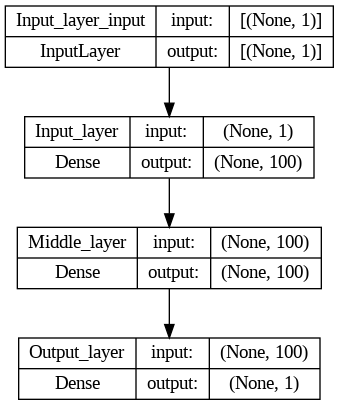

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

###Evaluation our model's predictions with regression evaluation metrics
Depending on the problem type, there are different evaluation metrics

MAE - Mean absolute error, "on average, how wrong is each of my model's predictions" tf.metrics.mean_absolute_error(y_test,y_pred)

MSE - Mean square error, "square the average errors"

when you have to compare tensors you must have both variables in tensor form and also having same shape, You can do squeeze or add extra dims

 Tensorboard - a compnent of tensorflow for visualization

 weights and biases - a way to visualize learning of model     

** To save the model**

two ways to save the model

1. savedmodel format
2. HDF5 file


In [ ]:
#By using the SavedModel format
model.save("demo_regression_model")

In [ ]:
#By using the HDF5 format
model.save("demo_regression_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
###how to access the saved model
saved_model =tf.keras.models.load_model("demo_regression_model")
saved_model.summary()

Model: "mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 100)               200       
                                                                 
 Middle_layer (Dense)        (None, 100)               10100     
                                                                 
 Output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 10401 (40.63 KB)
Trainable params: 10401 (40.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
###how to access the HDF5 model
hdf5_model = tf.keras.models.load_model("demo_regression_model.h5")
hdf5_model.summary()


Model: "mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 100)               200       
                                                                 
 Middle_layer (Dense)        (None, 100)               10100     
                                                                 
 Output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 10401 (40.63 KB)
Trainable params: 10401 (40.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
